In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", 'white', color_codes=True)
sns.set_style("white")

sns.set(font_scale = 1.5)
palette = "light:b"
palette = "Blues"

In [2]:
uczestnicy = pd.read_csv('PPK_Uczestnicy.csv', sep=';')

## Normalize AGE, reduce dim in NATIONALITY

In [3]:
n=25
most_frequent_nationality = uczestnicy['NATIONALITY'].value_counts()[:n].index.tolist()
print(most_frequent_nationality)
uczestnicy['NATIONALITY'] = uczestnicy['NATIONALITY'] * uczestnicy['NATIONALITY'].isin(most_frequent_nationality)

[187, 114, 136, 117, 19, 188, 194, 124, 169, 89, 134, 127, 110, 99, 200, 3, 176, 17, 183, 98, 49, 76, 5, 120, 56]


In [4]:
uczestnicy.drop('WORK_START', axis = 1, inplace = True)
uczestnicy.drop('WORK_STOP', axis = 1, inplace = True)
uczestnicy.drop('CREATED_AT', axis = 1, inplace = True)
uczestnicy.drop('NUMERICAL_VALUE', axis = 1, inplace = True)
uczestnicy.drop('UOZ_START_DATE', axis = 1, inplace = True)
uczestnicy.drop('UOP_SIGN_DATE', axis = 1, inplace = True)

uczestnicy = uczestnicy.assign(RESIGNED=uczestnicy['RESIGN_DATE'].fillna(0).astype(bool))
uczestnicy['RESIGNED'] = uczestnicy['RESIGNED'].astype(int)
uczestnicy.drop('SIGN_DATE', axis = 1, inplace = True)
uczestnicy.drop('RESIGN_DATE', axis = 1, inplace = True)

In [5]:
uczestnicy.head()
uczestnicy[uczestnicy['SEX']=="N"] = np.nan

## Pracodawcy

In [6]:
pracodawcy = pd.read_csv('PPK_Pracodawcy.csv', sep=';')
pracodawcy.head()

,ID,PPK_STAGE,LOGICAL_FACTOR_1,REGION_CODE,LOGICAL_FACTOR_2,VOIVODESHIP,PKD_CODE,COMPANY_SIZE,COMPANY_TYPE
0,1385,2,False,42185,False,LUBUSKIE,75.50,E,3.0
1,123590,4,False,42128,False,DOLNOŚLĄSKIE,65.70,NaN,NaN
2,73241,4,False,64124,False,ŚLĄSKIE,62.17,B,23.0
3,119777,4,True,65283,False,LUBELSKIE,1.36,A,16.0
4,77729,2,False,43185,False,ŚLĄSKIE,69.24,D,23.0


In [7]:
pracodawcy = pracodawcy.assign(GMINA=pracodawcy['REGION_CODE'].str[2:])
pracodawcy = pracodawcy.assign(POWIAT=pracodawcy['REGION_CODE'].str[:2])
pracodawcy.drop( 'REGION_CODE', axis = 1, inplace = True)
pracodawcy['POWIAT'].replace("NA", np.nan, inplace=True)
pracodawcy['GMINA'].replace("NANANANA", np.nan, inplace=True)

In [8]:
pracodawcy[['PKD_CODE']] = pracodawcy[['PKD_CODE']].astype('str')
pracodawcy = pracodawcy.assign(PKD_GROUP=pracodawcy['PKD_CODE'].str[:2])
pracodawcy.drop('PKD_CODE', axis=1, inplace=True)

In [9]:
df_inner = pd.merge(uczestnicy, pracodawcy, left_on='EMPL_ID', right_on='ID', how='inner')

df_inner['IS_SUSPENDED'] = df_inner['IS_SUSPENDED'] .astype(bool)
df_inner['PPK_BANK'] = df_inner['PPK_BANK'] .astype(int)


df_inner.drop('ID', axis = 1, inplace = True) ## the same PKD  code for the same employer
df_inner.drop('RESIGNED', axis = 1, inplace = True) ## the same PKD  code for the same employer
df_inner

,IS_SUSPENDED,MEMBER_ID,EMPL_ID,SEX,NATIONALITY,PPK_BANK,AGE,HAS_AE,HAS_AW,HAS_IP,PPK_STAGE,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,VOIVODESHIP,COMPANY_SIZE,COMPANY_TYPE,GMINA,POWIAT,PKD_GROUP
0,False,2106287.0,261078.0,M,187.0,18,"85,996",0.0,0.0,0.0,4,False,False,NaN,NaN,NaN,NaN,NaN,na
1,False,2106303.0,261078.0,M,136.0,18,"82,416",0.0,0.0,0.0,4,False,False,NaN,NaN,NaN,NaN,NaN,na
2,False,2106300.0,261078.0,K,136.0,18,"67,636",0.0,0.0,0.0,4,False,False,NaN,NaN,NaN,NaN,NaN,na
3,False,2106320.0,261078.0,M,136.0,18,"91,384",0.0,0.0,0.0,4,False,False,NaN,NaN,NaN,NaN,NaN,na
4,False,2106332.0,261078.0,M,136.0,18,"67,636",0.0,0.0,1.0,4,False,False,NaN,NaN,NaN,NaN,NaN,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616305,True,2037435.0,89.0,M,187.0,8,"63,724",0.0,0.0,0.0,3,False,False,DOLNOŚLĄSKIE,B,23.0,164,68,87
1616306,True,2037434.0,89.0,M,187.0,8,"45,324",0.0,0.0,0.0,3,False,False,DOLNOŚLĄSKIE,B,23.0,164,68,87
1616307,True,2037433.0,89.0,M,187.0,8,"86,752",0.0,0.0,0.0,3,False,False,DOLNOŚLĄSKIE,B,23.0,164,68,87
1616308,True,2037427.0,89.0,M,187.0,8,"49,228",0.0,0.0,0.0,3,False,False,DOLNOŚLĄSKIE,B,23.0,164,68,87


## SEX

In [10]:
df_inner[['SEX','IS_SUSPENDED' ]].value_counts(sort = False)  
## kobiety zostają w PPK w 80.9%, mężcyżni zostają w 84.3 %

SEX  IS_SUSPENDED
K    False           627579
     True            148055
M    False           708774
     True            131902
dtype: int64

In [11]:
627579/(627579+148055)

0.8091174445679277

In [12]:
708774/(708774+131902)

0.8431000766050178

## COMPANY SIZE

In [13]:
df_inner[['COMPANY_SIZE','IS_SUSPENDED' ]].value_counts(sort = False)  
## kobiety zostają w PPK w 80.9%, mężcyżni zostają w 84.3 %

COMPANY_SIZE  IS_SUSPENDED
A             False            21437
              True              1664
B             False            57249
              True              8161
C             False            82272
              True             12027
D             False           132902
              True             16841
E             False           172633
              True             29266
F             False           181786
              True             43054
G             False           170063
              True             42938
H             False           496574
              True            123812
dtype: int64

In [14]:
H = 496574/(496574+123812)
A = 21437/(21437+1664)
B= 57249/(57249+8161)
C= 82272/(82272+12027)
D= 132902/(132902+16841)
E= 172633/(172633+29266)
F= 181786/(181786+43054)
G= 170063/(170063+42938)

In [15]:
for i in [A,B,C,D,E,F,G,H]:
    print(i, '\t\t', 1-i)

0.9279684862127181 		 0.0720315137872819
0.8752331447790858 		 0.12476685522091424
0.87245888079407 		 0.12754111920593003
0.8875339748769558 		 0.11246602512304416
0.8550463350487125 		 0.14495366495128748
0.8085127201565557 		 0.19148727984344427
0.7984140919526199 		 0.20158590804738008
0.8004274757973262 		 0.1995725242026738


## PKD STAGE

In [16]:
df_inner.PPK_STAGE.value_counts(dropna=False,  normalize=True)

1    0.528200
4    0.254590
2    0.159164
3    0.058045
Name: PPK_STAGE, dtype: float64

In [17]:
df_inner[['PPK_STAGE','IS_SUSPENDED' ]].value_counts(sort = False)  


PPK_STAGE  IS_SUSPENDED
1          False           671963
           True            181772
2          False           215865
           True             41394
3          False            77516
           True             16303
4          False           371009
           True             40488
dtype: int64

In [18]:
stage1=671963/853735
stage2 = 215865/257259
stage3=77516/93819
stage4=371009/411497
for i in [stage1, stage2, stage3, stage4]:
    print(i)

0.7870861567113917
0.8390960083029165
0.8262292286210682
0.9016080311642612


## Plots!

In [19]:
test =df_inner[['HAS_AE', 'HAS_AW', 'HAS_IP', 'IS_SUSPENDED']].copy()
test = test.astype(bool)
test =df_inner[['HAS_AE', 'HAS_AW', 'HAS_IP', 'IS_SUSPENDED']].copy()

test_not_suspended = test[test['IS_SUSPENDED']==False]
test_suspended = test[test['IS_SUSPENDED']==True]

HAS_AE = test_not_suspended[test_not_suspended['HAS_AE']==True]['HAS_AE'].count()
HAS_NOT_AE = test_not_suspended[test_not_suspended['HAS_AE']==False]['HAS_AE'].count()

HAS_AW = test_not_suspended[test_not_suspended['HAS_AW']==True]['HAS_AW'].count()
HAS_NOT_AW = test_not_suspended[test_not_suspended['HAS_AW']==False]['HAS_AW'].count()

HAS_IP = test_not_suspended[test_not_suspended['HAS_IP']==True]['HAS_IP'].count()
HAS_NOT_IP = test_not_suspended[test_not_suspended['HAS_IP']==False]['HAS_IP'].count()

IS_SUSPENDED_FALSE = [HAS_AE, HAS_NOT_AE, HAS_AW, HAS_NOT_AW, HAS_IP, HAS_NOT_IP]
HAS_AE = test_suspended[test_suspended['HAS_AE']==True]['HAS_AE'].count()
HAS_NOT_AE = test_suspended[test_suspended['HAS_AE']==False]['HAS_AE'].count()

HAS_AW = test_suspended[test_suspended['HAS_AW']==True]['HAS_AW'].count()
HAS_NOT_AW = test_suspended[test_suspended['HAS_AW']==False]['HAS_AW'].count()

HAS_IP = test_suspended[test_suspended['HAS_IP']==True]['HAS_IP'].count()
HAS_NOT_IP = test_suspended[test_suspended['HAS_IP']==False]['HAS_IP'].count()

IS_SUSPENDED_TRUE = [HAS_AE, HAS_NOT_AE, HAS_AW, HAS_NOT_AW, HAS_IP, HAS_NOT_IP]

In [20]:
test[['HAS_IP','IS_SUSPENDED' ]].value_counts(sort = False)  
## Ci, co dostają wpłatę powitalną raczej nie rezygnują: 
## dostał wpłatę powitalną, na 93% nie zrezygnuje, jeżeli nie dostał wpłaty powitalnej, na 71% nie zrezygnuje

HAS_IP  IS_SUSPENDED
0.0     False           562371
        True            226401
1.0     False           773982
        True             53556
dtype: int64

In [21]:
test[['HAS_AE','IS_SUSPENDED' ]].value_counts(sort = False)
## dodatkową wpłata pracodawcy
## wpłata od pracodawcy -> na 92% nie zrezygnuje, brak wpłaty od pracodawcy -> na 82 % zrezygnuje

HAS_AE  IS_SUSPENDED
0.0     False           1308690
        True             277641
1.0     False             27663
        True               2316
dtype: int64

In [22]:
test[['HAS_AW','IS_SUSPENDED' ]].value_counts(sort = False)
## wpłaca własną dodatkową wpłata pracownika
## jeżeli ma własna wpłata pracownika, to nie zrezygnuje 97%,  jeżeli nie ma własna wpłata pracownika, to nie zrezygnuje na 82.5%

HAS_AW  IS_SUSPENDED
0.0     False           1321455
        True             279498
1.0     False             14898
        True                459
dtype: int64

In [23]:
test[['IS_SUSPENDED', 'HAS_AW' ]].value_counts(sort = False)

IS_SUSPENDED  HAS_AW
False         0.0       1321455
              1.0         14898
True          0.0        279498
              1.0           459
dtype: int64

In [24]:
test[['IS_SUSPENDED', 'HAS_IP' ]].value_counts(sort = False)

IS_SUSPENDED  HAS_IP
False         0.0       562371
              1.0       773982
True          0.0       226401
              1.0        53556
dtype: int64

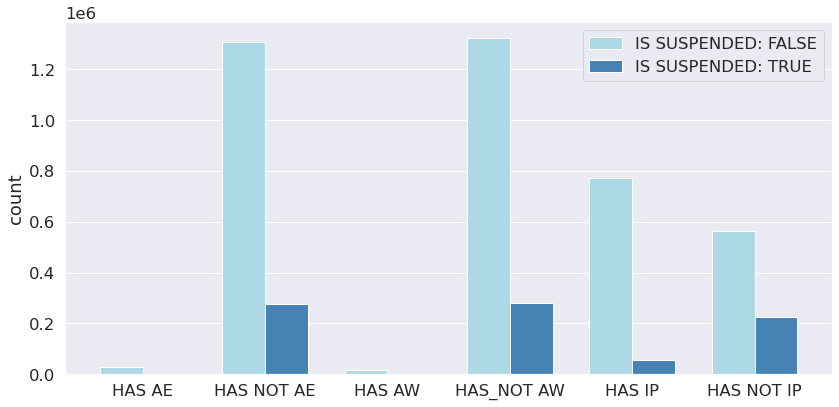

In [25]:
labels = ['HAS AE', 'HAS NOT AE', 'HAS AW', 'HAS_NOT AW', 'HAS IP', 'HAS NOT IP']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, IS_SUSPENDED_FALSE, width, label='IS SUSPENDED: FALSE', color='lightblue')
rects2 = ax.bar(x + width/2, IS_SUSPENDED_TRUE, width, label='IS SUSPENDED: TRUE', color ='steelblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='x')
fig.tight_layout()

plt.show()


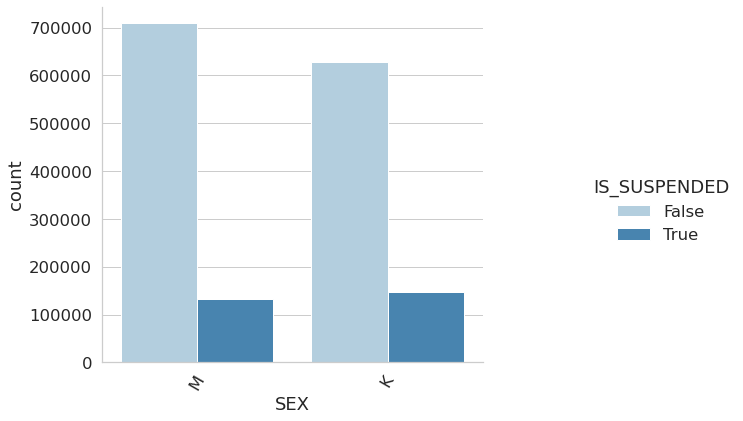

In [26]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")


g = sns.catplot(x="SEX", kind="count", hue="IS_SUSPENDED",  palette=palette,  data=df_inner)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
g.set_xticklabels(rotation=60)

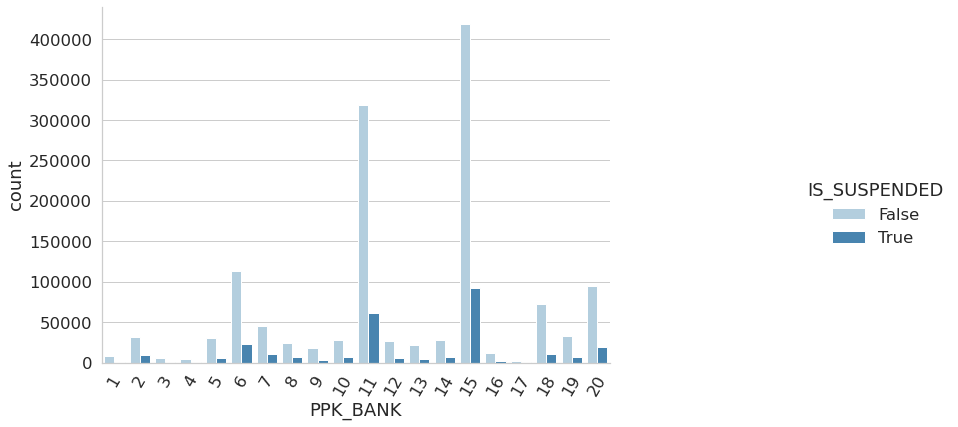

In [27]:
g = sns.catplot(x="PPK_BANK", kind="count", hue="IS_SUSPENDED",  palette=palette,  data=df_inner)
g.fig.set_figwidth(16)
g.fig.set_figheight(6)
g.set_xticklabels(rotation=60)

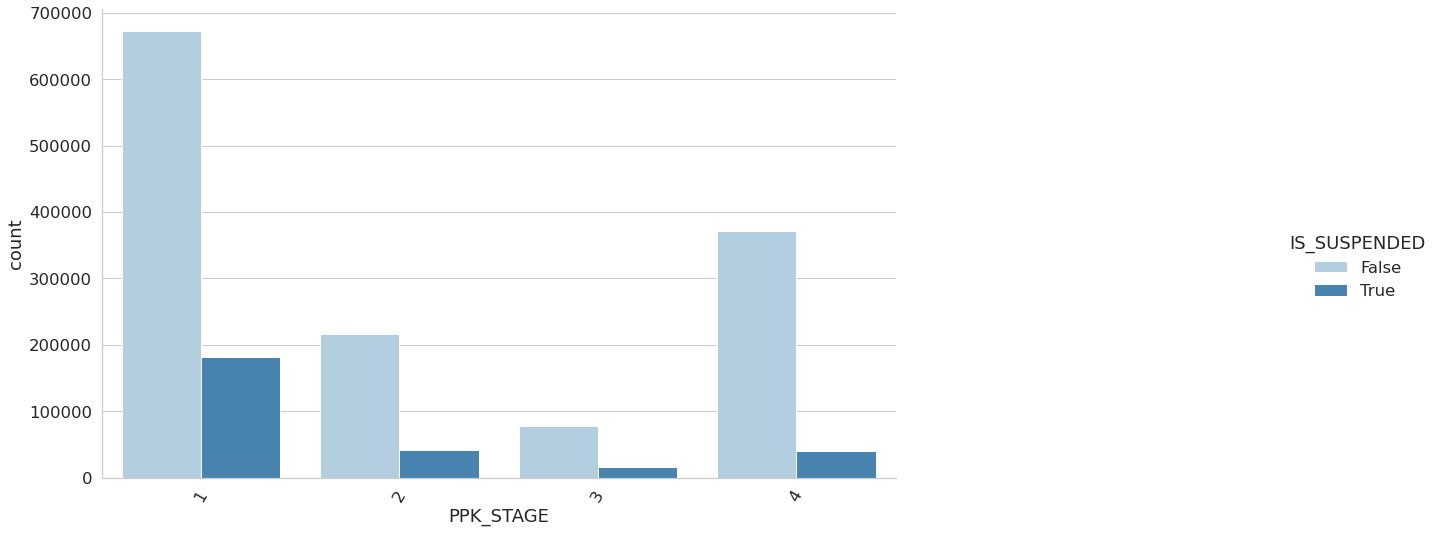

In [28]:
g = sns.catplot(x="PPK_STAGE", kind="count", hue="IS_SUSPENDED",  palette=palette,  data=df_inner)
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=60)

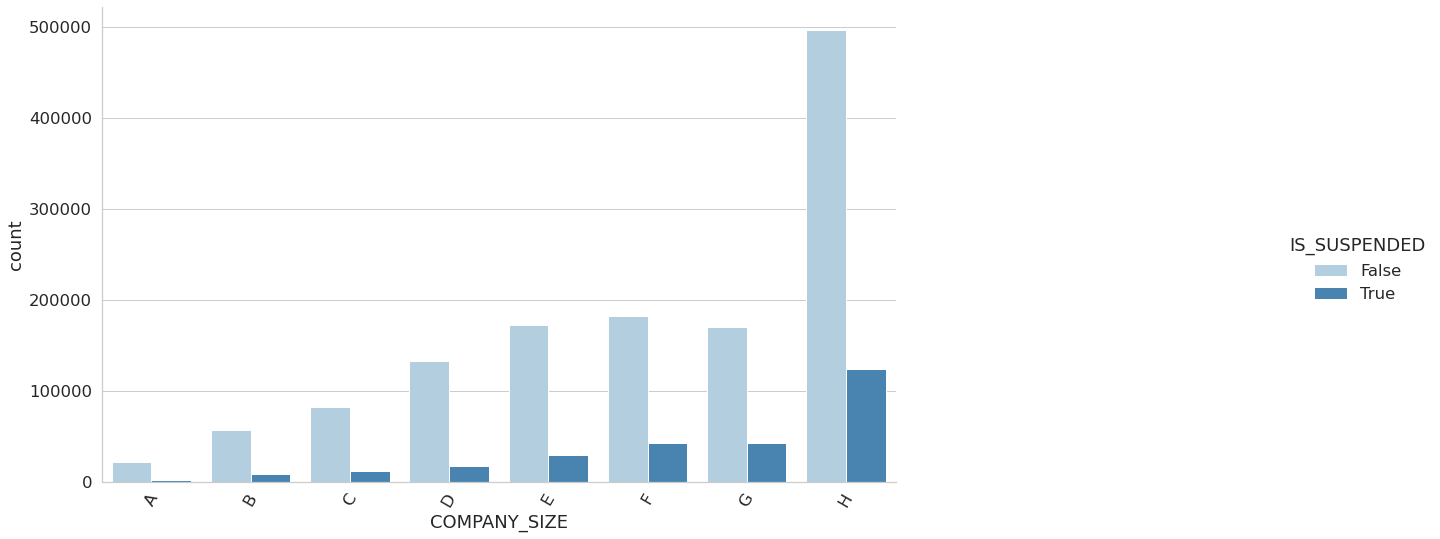

In [29]:
g = sns.catplot(x="COMPANY_SIZE", kind="count", hue="IS_SUSPENDED",  palette=palette,  data=df_inner.sort_values(by=['COMPANY_SIZE'],ascending=True))
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=60)

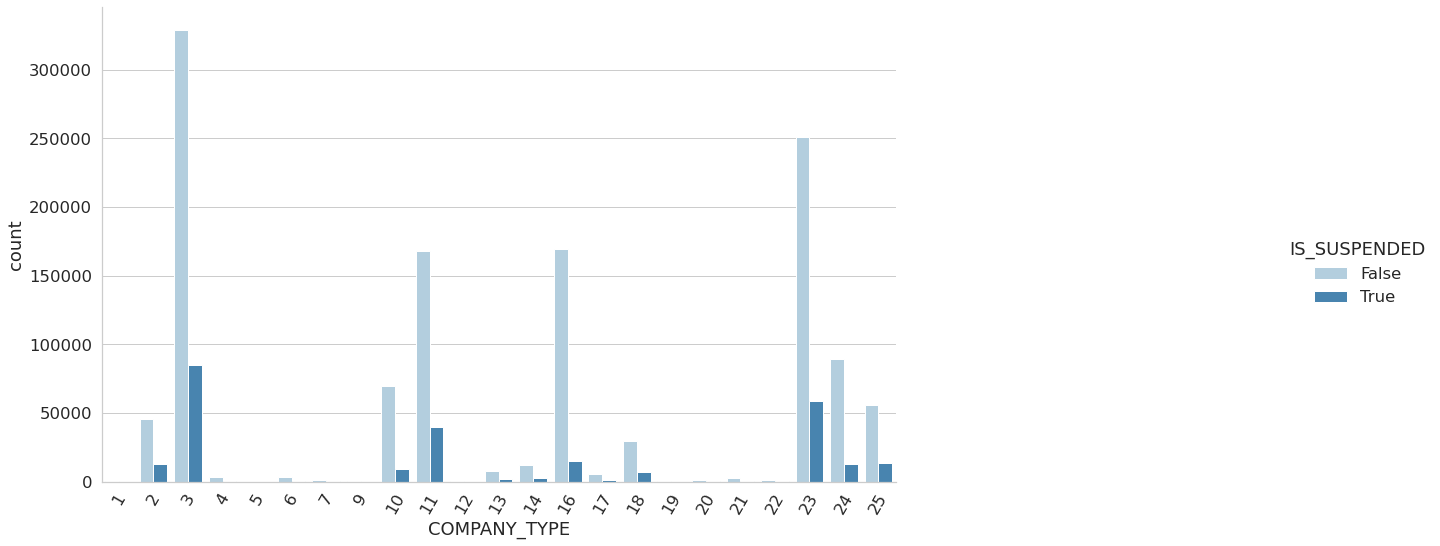

In [30]:
tmp=df_inner.copy()
tmp['COMPANY_TYPE'] = tmp['COMPANY_TYPE'].astype(str)
tmp = tmp.assign(COMPANY_TYPE=tmp['COMPANY_TYPE'].str[:-2])
tmp = tmp[tmp.COMPANY_TYPE != 'n']
tmp['COMPANY_TYPE'] = tmp['COMPANY_TYPE'].astype(int)


g = sns.catplot(x="COMPANY_TYPE", kind="count", hue="IS_SUSPENDED",  palette=palette,  data=tmp)
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=60)

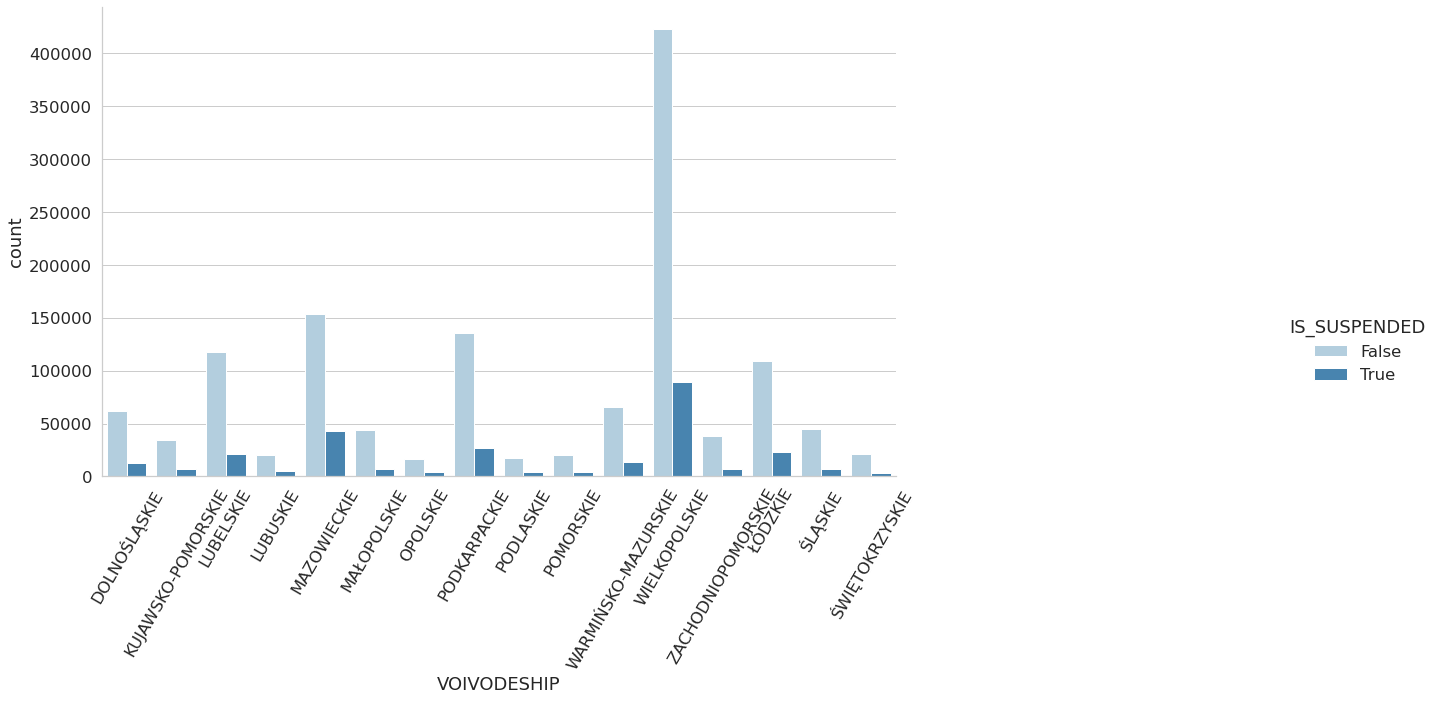

In [31]:
g = sns.catplot(x="VOIVODESHIP", kind="count", hue="IS_SUSPENDED",  palette=palette,  data=df_inner.sort_values(by=['VOIVODESHIP'],ascending=True))
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=60)